In [9]:
using PyPlot
#using PGFPlots 
#using Winston


In [330]:
include("sim.jl"); #include the simulator 
include("floopMap.jl") #include mapping

Import successful: sim.jl
Import successful: floopMap.jl


1x2 Array{Int64,2}:
 4  4

In [238]:
arm=ccQuick(map(deg2rad, state), l)[end,:]

1x2 Array{Float64,2}:
 1.39345  -0.0623168

stateMap.nSize => 2825761
actionMap.nSize => 81
no self collsions founds


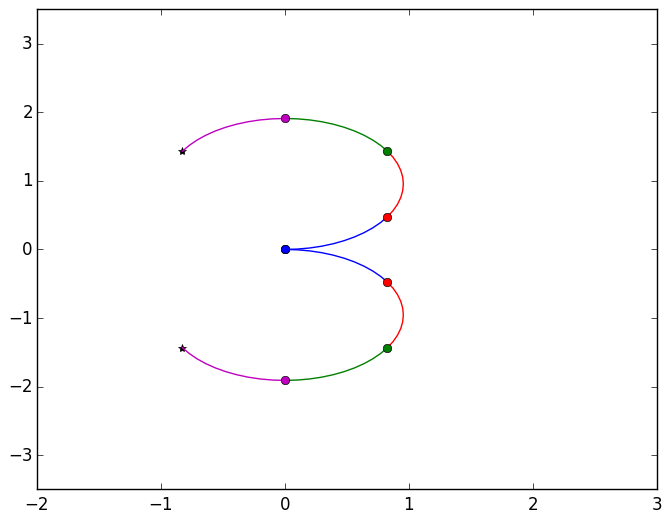

(-3.5,3.5)

In [366]:
#defne parameters
nSeg=4 #number of segments
aStep=3 #angle step 
aLimit=60
res=10 #resolution of segment 
l=1/res #set subsegment lenght so that segment lenght =1

#make maps
stateMap=makeMap([-aLimit:aStep:aLimit], nSeg)
actionMap=makeMap([-aStep:aStep:aStep], nSeg)

#set state
stateInd=rand(1:stateMap.nSize)
#stateInd=10
actionInd=rand(1:actionMap.nSize)

minState=ind2eval(1, stateMap)
maxState=ind2eval(stateMap.nSize, stateMap)

##make arm 
(arm,edges,t)=ccArm2(map(deg2rad, minState), res, l);
drawArm(arm, edges, res)

(arm,edges,t)=ccArm2(map(deg2rad, maxState), res, l);
drawArm(arm, edges, res)

@show stateMap.nSize
@show actionMap.nSize


##check self collide
selfCollide(arm, .060)

##make obs
obby=Obs([1.5 -.5], .2)
#drawObs(Obs(c, r))

#check obs collision
#obsCollide(arm, Obs(c, r), 1.1)

#ploted for style
pmax=maximum(abs(arm))*1.1
#plot(p[:, 1],p[:, 2])
#xlabel("x")
#ylabel("y")
xlim(-2, 3)
ylim(-3.5, 3.5)
#savefig("arm.png")

In [367]:
ePos=zeros(stateMap.nSize,2) #get end effector pos for each state
tic()
for s=1:stateMap.nSize
    state=ind2eval(s, stateMap)
    ePos[s,:]=ccQuick(map(deg2rad, state), 1)[end,:]
end
toc()

elapsed time: 56.552998215 seconds


56.552998215

In [ ]:
plot(ePos[:,1], ePos[:,2], "ko")
title("reachable set")
xlabel("x")
ylabel("y")
savefig("reach_$(nSeg)_$(aLimit).png")

In [ ]:
#init value func
value=zeros(stateMap.nSize)
nullAction=round(actionMap.nSize/2)
policy=int64(ones(stateMap.nSize)*nullAction)
γ=.9
tic()
goal=[1 -3]
goalTrh=.1
for s=1:stateMap.nSize
    value[s]=norm(ePos[s_,:]-goal)<goalTrh? 100:0 
end

In [ ]:
#run value itr
for i=1:3
    tic()
    for s=1:stateMap.nSize

        for a =1:actionMap.nSize 
            #get next state
            s_=detTrans(s, a, stateMap, actionMap)
            #calulae endEff pos

            #get reward  
            R=norm(ePos[s_,:]-goal)<goalTrh? 100:0  #calculate distance from goal

            #update value
            score=R+γ*value[s_]
            if score>value[s]
                score= score>100? 100:score #keep it from blowing up
                value[s]=score
                policy[s]=a
            end 
        end 
        if s>100 
            break
        end
        
    end
    println("Itr: $(i)")
    @show norm(value)
    toc()
end

In [365]:
stateMap.nSize/100 * 2.7 /60/60

73.2421875

norm((ccQuick(map(deg2rad,state),1))[end,:] - goal) => 5.043208510548531
norm((ccQuick(map(deg2rad,state),1))[end,:] - goal) => 4.656327714122574
norm((ccQuick(map(deg2rad,state),1))[end,:] - goal) => 4.201698969963664
norm((ccQuick(map(deg2rad,state),1))[end,:] - goal) => 3.6879132593475283
norm((ccQuick(map(deg2rad,state),1))[end,:] - goal) => 3.1250609983257873
norm((ccQuick(map(deg2rad,state),1))[end,:] - goal) => 2.524453911644106
norm((ccQuick(map(deg2rad,state),1))[end,:] - goal) => 1.8983243300241899
norm((ccQuick(map(deg2rad,state),1))[end,:] - goal) => 1.259520819531744
norm((ccQuick(map(deg2rad,state),1))[end,:] - goal) => 0.621320108076993
norm((ccQuick(map(deg2rad,state),1))[end,:] - goal) => 0.20443845179913914
norm((ccQuick(map(deg2rad,state),1))[end,:] - goal) => 0.1777236964115669
norm((ccQuick(map(deg2rad,state),1))[end,:] - goal) => 0.22834941114077684
norm((ccQuick(map(deg2rad,state),1))[end,:] - goal) => 0.2472823250204595
norm((ccQuick(map(deg2rad,state),1))[end,:

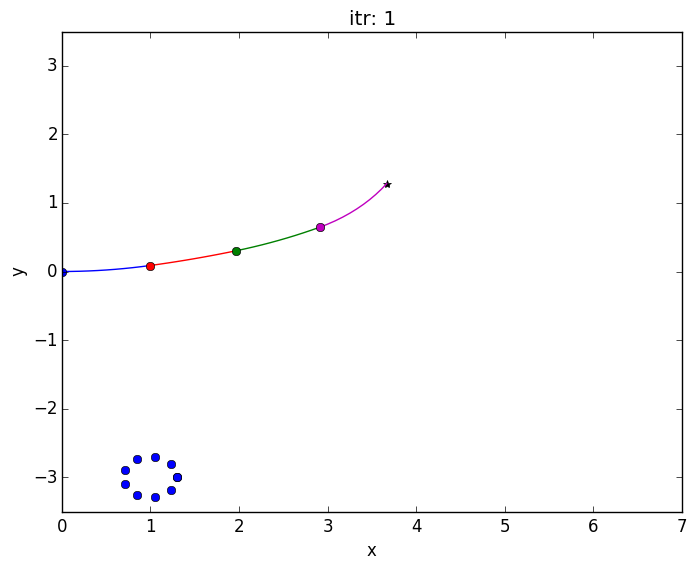

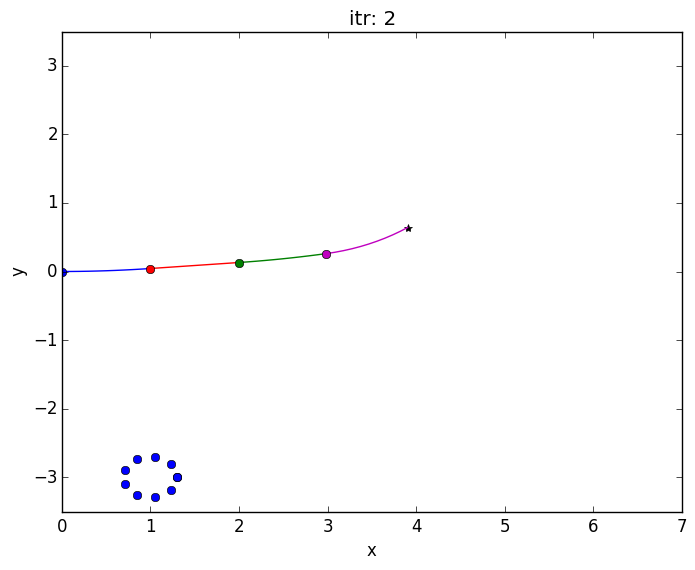

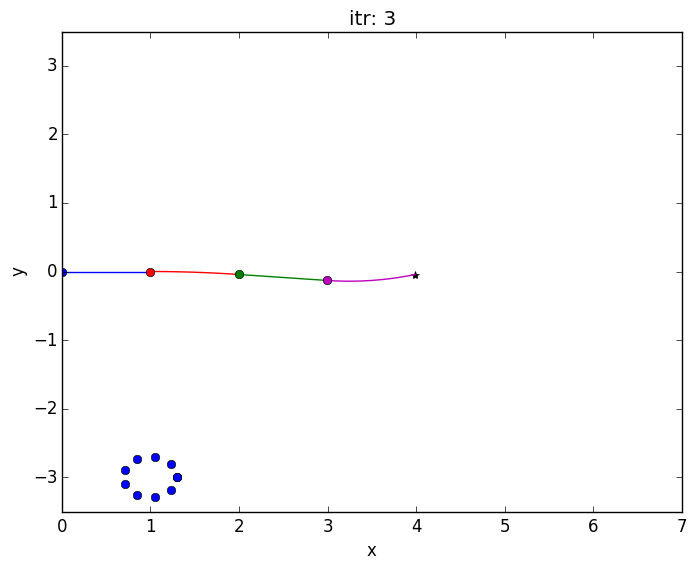

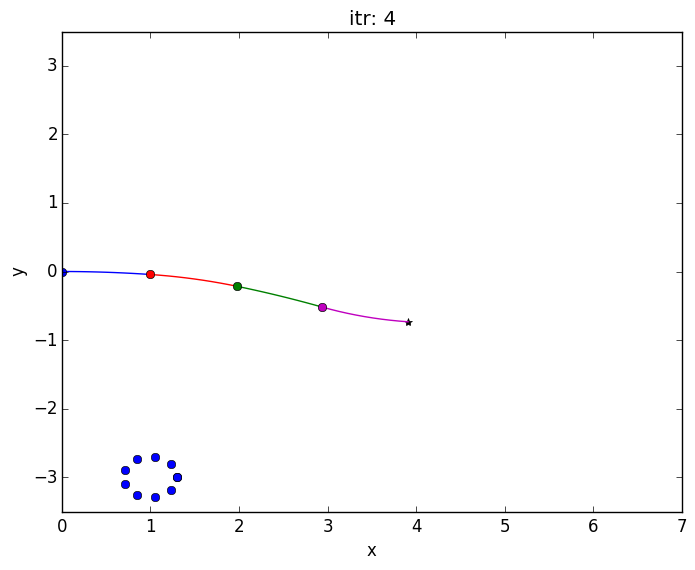

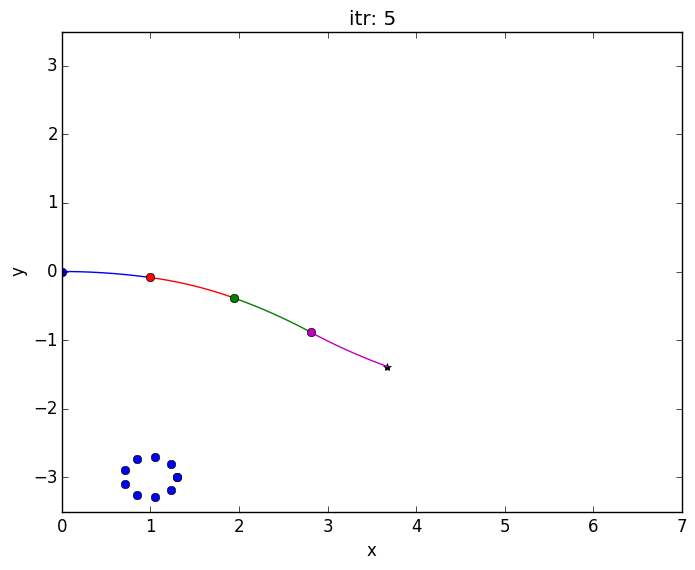

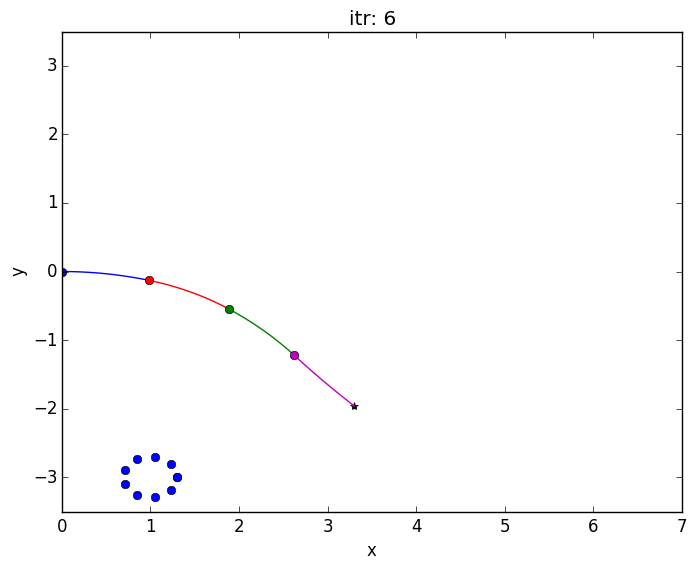

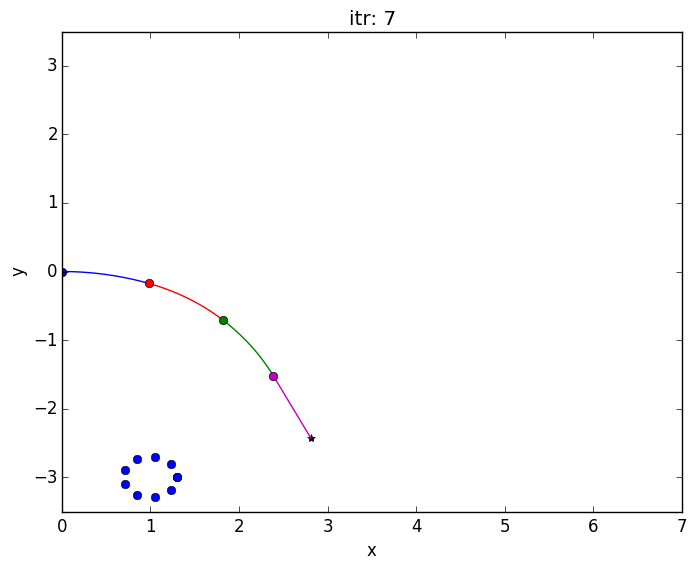

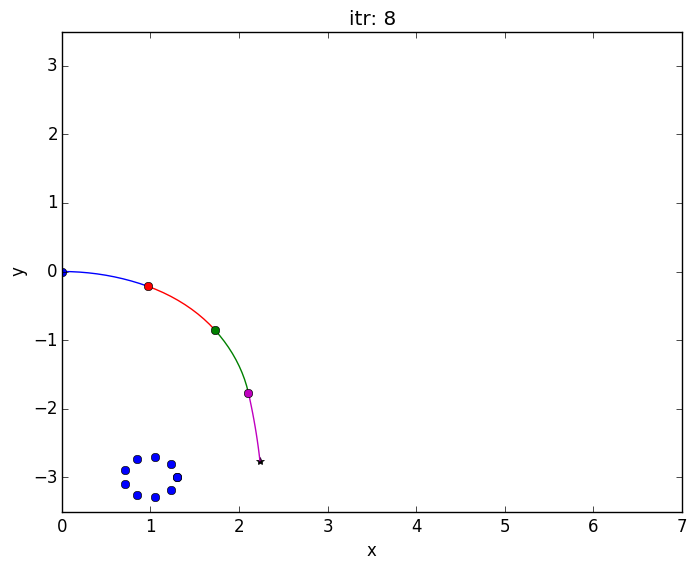

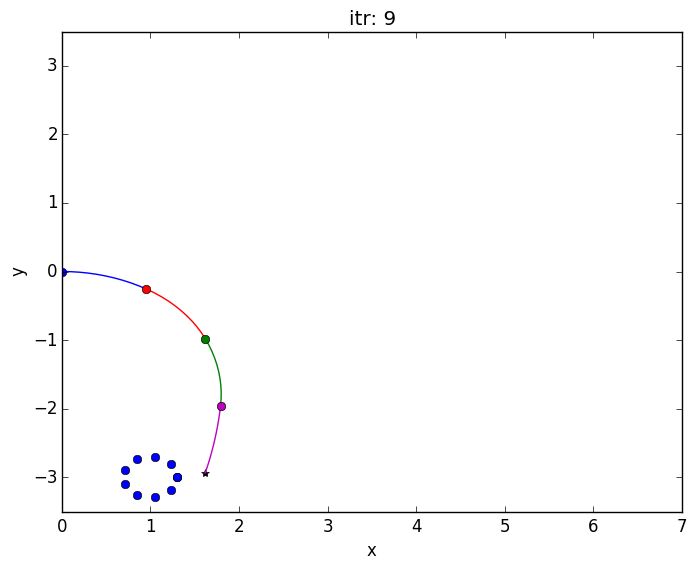

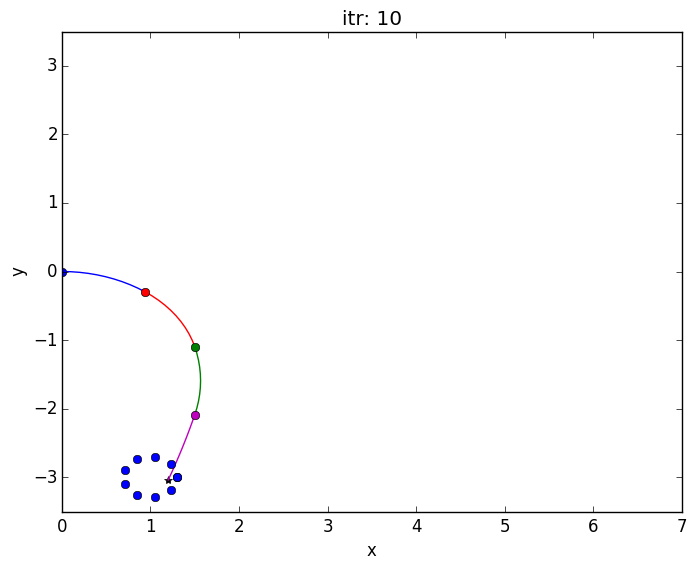

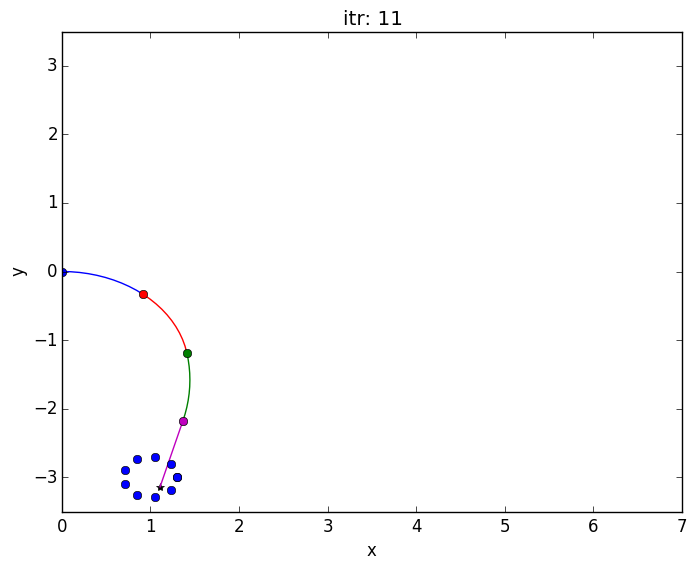

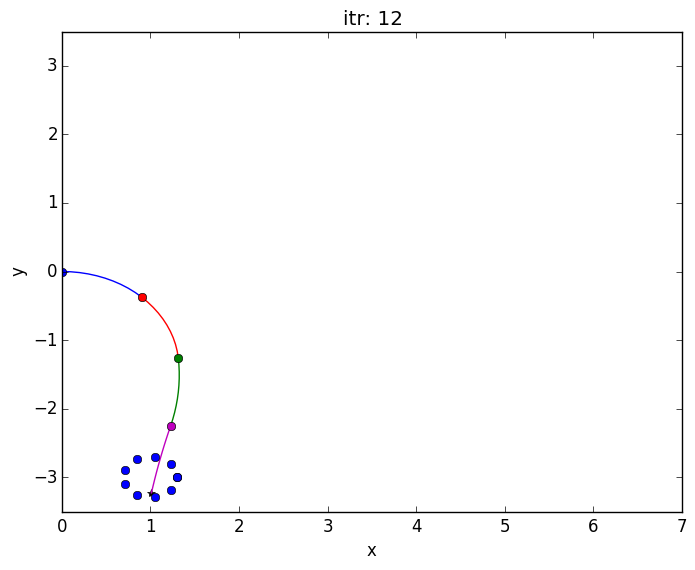

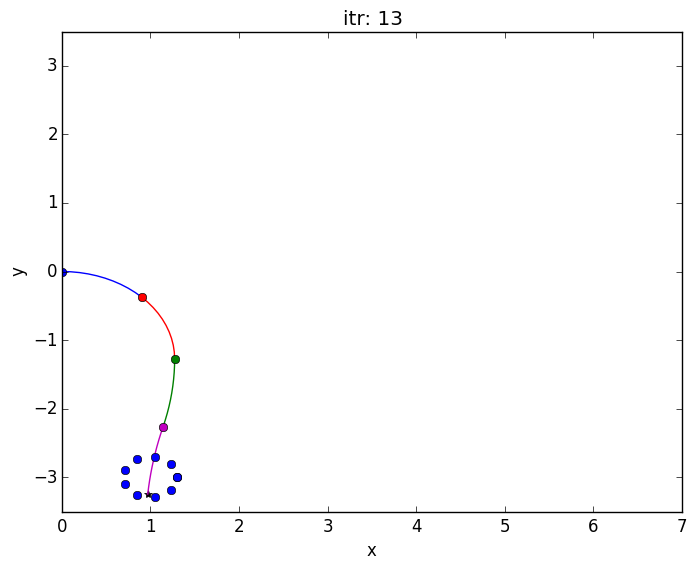

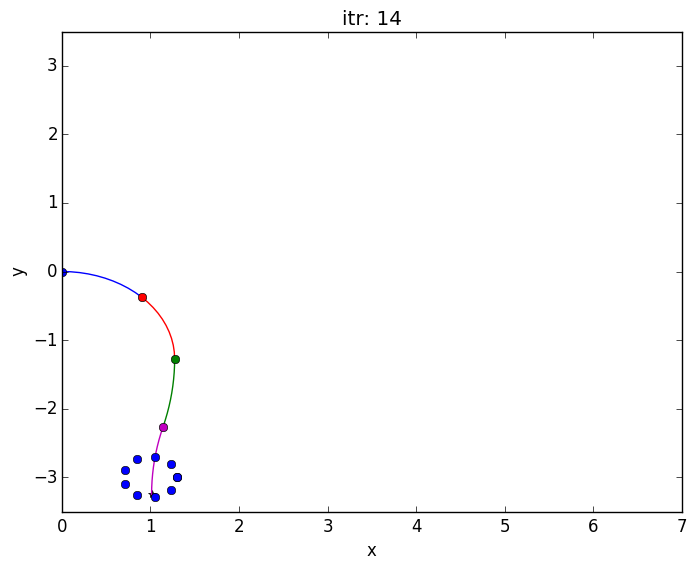

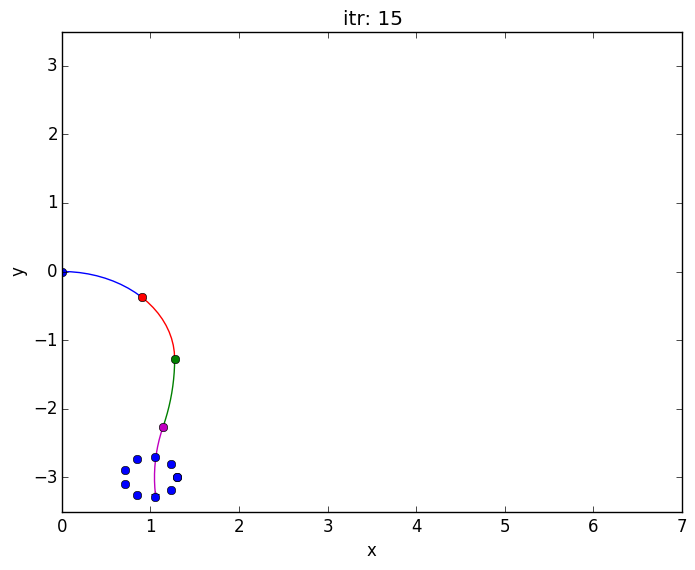

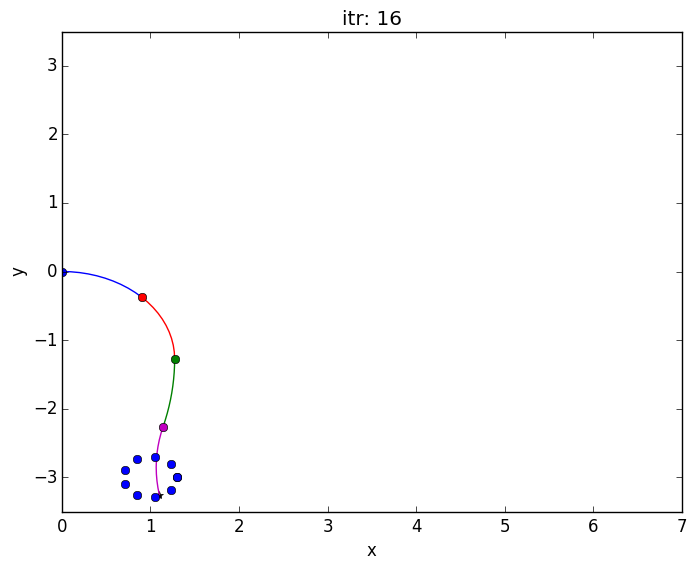

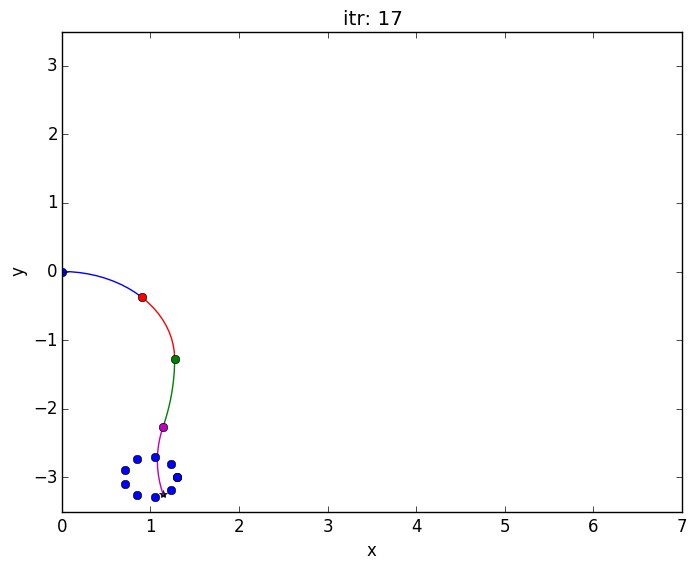

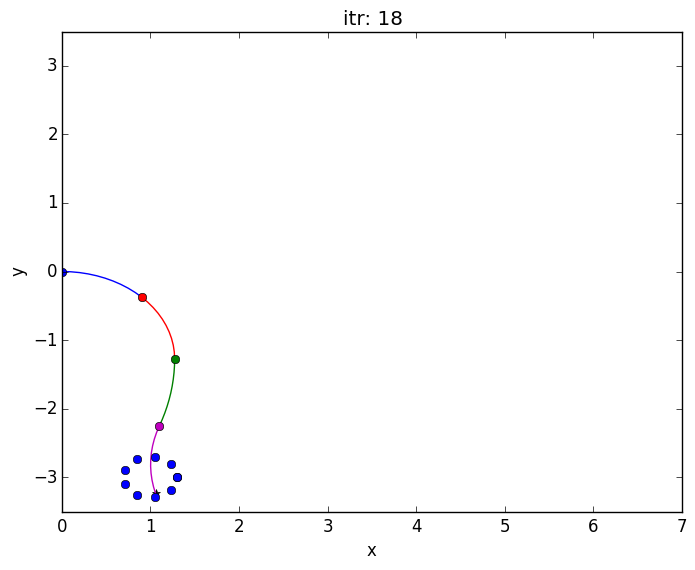

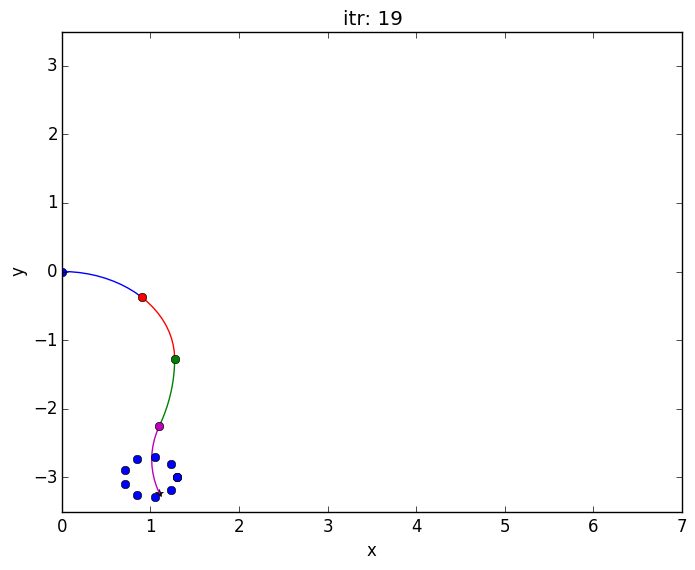

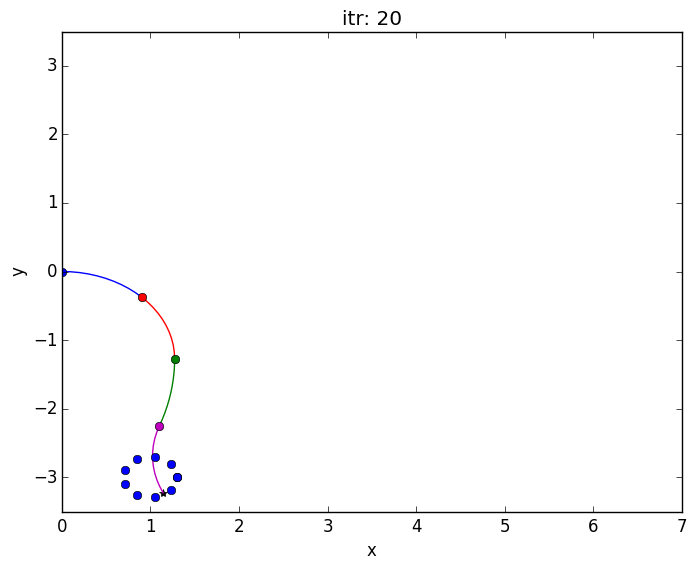

0.2679567355619283

In [338]:
#eval policy 
stateInd=rand(1:stateMap.nSize)


for i=1:20
    figure()
    #get state eval
    state=ind2eval(stateInd, stateMap)
    ##make arm 
    (arm,edges,t)=ccArm2(map(deg2rad, state), res, l);
    drawArm(arm, edges, res);
    obGoal=Obs(goal, goalTrh)
    drawObs(obGoal)
    title("itr: $(i)")
    xlabel("x")
    ylabel("y")
    xlim(-0, 7)
    ylim(-3.5, 3.5)
    savefig("test1//$(i).png")
    #get action
    actionInd=policy[stateInd]
    #get next state
    stateInd=detTrans(stateInd, actionInd, stateMap, actionMap)
    @show norm(ccQuick(map(deg2rad, state), 1)[end,:]-goal)
end
state=ind2eval(stateInd, stateMap)
##make arm 

In [334]:
ccQuick(map(deg2rad, state), 1)[end,:]

1x2 Array{Float64,2}:
 1.09981  -3.253

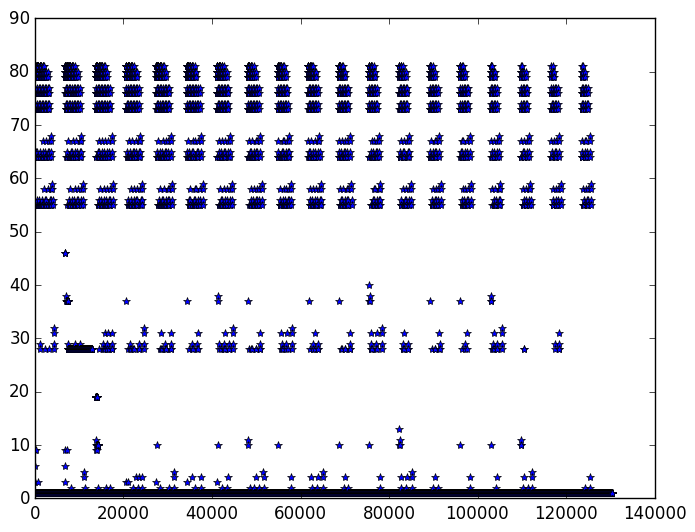

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003A0BF278>

In [313]:
plot(policy, "b*")

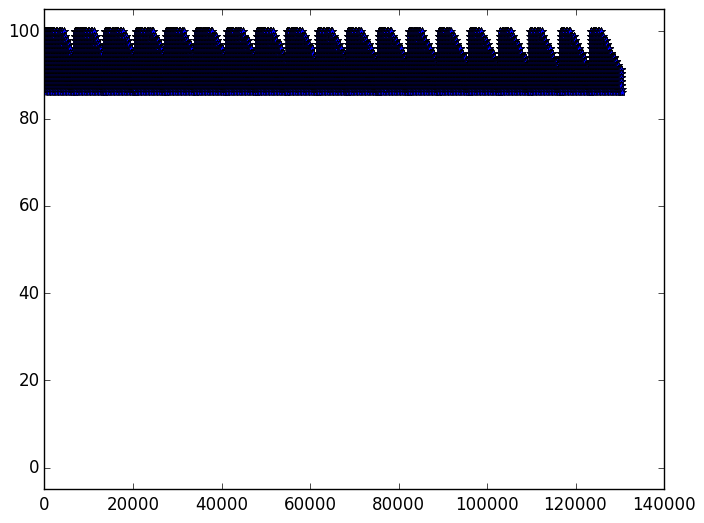

(-5,105)

In [314]:
plot(value, "b*")
ylim(-5, 105)

In [209]:
eEff-goal'

1x2 Array{Float64,2}:
 -0.9  3.00009

In [122]:
@show stateMap.nSize
@show actionMap.nSize

stateMap.nSize => 9765625
actionMap.nSize => 243


243

In [170]:
ind2eval(122, actionMap)

5-element Array{Any,1}:
 0
 0
 0
 0
 0

In [23]:
a=int64(ones(5)*25)
b=tuple(a...)

(25,25,25,25,25)

In [88]:
sub2ind((25, 25, 25, 25, 25), (15, 2, 1, 1, 1))

LoadError: `sub2ind` has no method matching sub2ind(::(Int64,Int64,Int64,Int64,Int64), ::(Int64,Int64,Int64,Int64,Int64))
while loading In[88], in expression starting on line 1

In [ ]:
nStates=41^n
value=zeros(nStates)
tic()
for i=1:nStates
    value[i]+=1
end
toc()

In [ ]:
function smash(e)
	n=size(e,1)
	e=e'
	#checks for colisions 
	for i=1:(n-2)
		for j=(i+1):(n-1)
			t=inv(hcat(e[:,i+1]-e[:,i], e[:,j+1]-e[:,j]))*e[:,i]-e[:,j]
			col=vcat(t.<0,t.>1 )
			if norm(col)==0
				return e[:,i]+t[1]*(e[:,i+1]-e[:,i])
			end
		end	
	end
    return 0
end

In [ ]:
smash(e)

In [ ]:
#defne parameters
l=1 #segment len
n=10 #number of segments 
res=1000
#k=[.4 -1 1 1 1]
gain=2
pdif=rand(n)*gain
#pdif=ones(n)*1
(p,t)=cantArm(pdif, res, l, 1);
gcol=["b","r", "g", "m", "c", "b","r", "g", "m", "c"]
plot([p[end,1]],[p[end, 2]], "k*")
#plot([p[:,1]],[p[:, 2]], "k")
for i=1:n
    inx=(i-1)*res+1
    plot(p[inx:inx+res, 1],p[inx:inx+res, 2], gcol[i])
end
#plot(p[:, 1],p[:, 2])
xlabel("x")
ylabel("y")
#xlim(0, 13)
#ylim(-3, 3 )
#savefig("arm.png")

In [ ]:
function TestccSeg(k, res, l=1)
    t=linspace(0, k*l, res+1) #calcuate angle change
    p=zeros(res+1, 2)
    y=zeros(res+1)
    for i=1:res 
        p[i+1, 1]=p[i, 1]+(sin(t[i+1])-sin(t[i]))/k #update x 
        p[i+1, 2]=p[i, 2]+(-cos(t[i+1])+cos(t[i]))/k #update y
    end
    return (p[:, 1], p[:, 2], t[end])
end

In [ ]:
(x, y, t)=ccSeg(5, 100, 1)
plot(x, y)

In [ ]:
plot(t,"k*")


In [ ]:
x=[0:.1:1]
y=zeros(length(x))
t=zeros(length(x))
for i=1:length(x)
    y[i]=deflec(x[i], 1)
    t[i]=curv(x[i], 1)
end
plot(x,y)